In [3]:
from __future__ import division       
import math
#import matplotlib as mpl              ### May need to uncomment these two lines for mac osx users
#mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plot
plot.style.use('ggplot')
import pandas as pandas
import numpy as numpy
%matplotlib inline

//anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Let's load in the dataset into a pandas dataframe

In [2]:
manifest = pandas.read_csv("data/titanic_manifest.csv") # read CSV will put all the rows in the csv into a variable called df
manifest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
manifest.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Lets see the types that were imported on our behalf

In [5]:
manifest.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
manifest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
manifest.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


See the shape of the dataset

In [8]:
manifest.shape

(891, 12)

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [9]:
len(manifest) # len is a length function.  we can get the number of rows in the data frame with len

891

In [10]:
len(manifest.columns) # this will get the number of columns

12

In [11]:
# where df.columns is 
manifest.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
manifest["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [13]:
my_famous_passenger = manifest[manifest["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)

     PassengerId  Survived  Pclass                      Name   Sex   Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male  46.0   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [25]:
###Lets get some information about a column

### Like mean age on the boat
manifest["Age"].mean()
out = manifest["Age"].mean()
round(out, 2)

29.7

In [17]:
### Fare
manifest["Fare"].mean()
manifest["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
my_rich_passenger = manifest[manifest["Fare"] == 512.3292]
print(my_rich_passenger)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


In [21]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
cols = list(manifest.columns.values)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [22]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
rearranged_manifest = manifest[cols]
rearranged_manifest.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5


In [26]:
#### We can create new dataframes from a few attributes
sex_age_dataframe = manifest[["Sex","Age"]]
sex_age_dataframe.head()


,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [32]:
women_dataframe = manifest[manifest["Sex"] == "female"] #### Elaborate and find out what it means to df a df? Look up panda series
men_dataframe = manifest[manifest["Sex"] == "male"]

In [33]:
women_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
men_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Excercise 

From the Create one data frame for each Pclass.  Pclass is the passenger class.

* 1 for 1st class
* 2 for 2nd class
* 3 for 3rd class

In [48]:
#first_class
firstclass = manifest[manifest["Pclass"] == 1]
firstclass.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [47]:
firstclass.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [44]:
#second_class
secondclass = manifest[manifest["Pclass"] == 2]
secondclass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [49]:
secondclass.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [45]:
thirdclass = manifest[manifest["Pclass"] == 3]
thirdclass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [50]:
thirdclass.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


Observations: There were many people in third class. More so than the other two class of passengers combined.

We can create new attributes from other attributes.

Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize

In [53]:
manifest["FamilySize"] = manifest["SibSp"] + manifest["Parch"]
manifest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [62]:
# create a new attribute combining the name with the cabin
manifest["Name_Cabin"] = manifest["Name"] + manifest["Cabin"].fillna(' - ') 
# what should go here? you can do it!
manifest.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_Cabin
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,"Montvila, Rev. Juozas -"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,"Graham, Miss. Margaret EdithB42"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3,"Johnston, Miss. Catherine Helen ""Carrie"" -"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,"Behr, Mr. Karl HowellC148"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,"Dooley, Mr. Patrick -"


In [ ]:
#manifest["Name_Cabin"] = manifest[""] # what should go here if I want to format the data like this "<name> - <cabin>" (name dash cabin)
#manifest.tail()

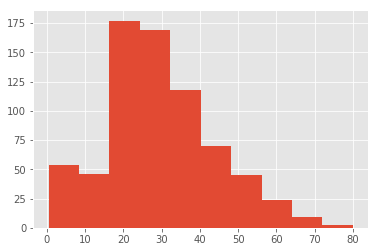

In [63]:
manifest["Age"].hist()

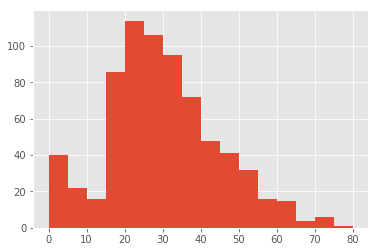

In [64]:
manifest["Age"].dropna().hist(bins=16, range=(0,80))

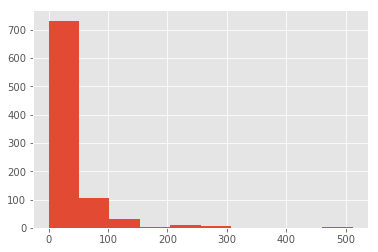

In [65]:
manifest["Fare"].hist()

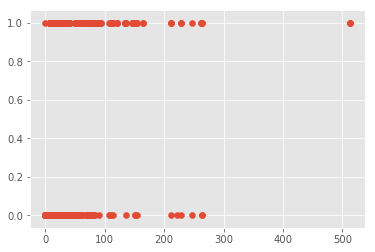

In [66]:
plot.scatter(manifest['Fare'], manifest['Survived']) #scatter is a function of x-axis values and y-axis values
plot.show()

In [67]:
### Side step
# Lets create a random numbers scatter plot

rando_dictionary = {'one' : numpy.random.rand(10), # 10 random numbers
     'two' : numpy.random.rand(10)}
print(rando_dictionary)

{'one': array([ 0.28930493,  0.83508315,  0.85238661,  0.74481987,  0.79276407,
        0.11426745,  0.1694407 ,  0.29457868,  0.76676452,  0.29053504]), 'two': array([ 0.0329021 ,  0.87594536,  0.390443  ,  0.19618418,  0.63717988,
        0.41685437,  0.07512534,  0.31510266,  0.96248254,  0.28851217])}


In [68]:
rando_dataframe = pandas.DataFrame(rando_dictionary) # create a new data frame with the dictionary of random numbers
rando_dataframe.  # display the top rows in rando_dataframe

SyntaxError: invalid syntax (<ipython-input-68-91a153fd2cfa>, line 2)

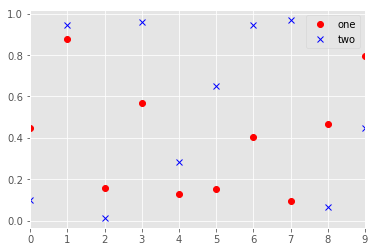

In [87]:
rando_dataframe.plot(style=['ro','bx'])

In [ ]:
##### Back to the titanic. So we have our original dataset
manifest.head()

In [ ]:
#### Lets group them by gender
grouped_by_sex = manifest.groupby(["Sex"])
grouped_by_sex.describe()

In [ ]:
#### Lets group them by gender and passenger class
grouped_by_sex_and_pclass = manifest.groupby(["Sex", "whatgoeshere?"]) # fill it in yourself
grouped_by_sex_and_pclass.describe()

In [ ]:
#### Lets group them by gender and passenger class and who survived
grouped_by_sex_pclass_survived = manifest.groupby(["Sex", "whatgoeshere?", "whatogeshere"]) # fill it in yourself
grouped_by_sex_pclass_survived.describe()

In [ ]:
manifest.groupby(["Sex", "Pclass"]).count() ### Count of records in each group throughout a dataset

# Logistic Regression

In [ ]:
# we can use these libraries.  so let's import them first

import statsmodels.api as stats
import pylab as pylab


In [ ]:
print(manifest.columns)

In [ ]:
# Create a new temporary data frame
temp_manifest = manifest

def gender_to_numeric(x):  # convert sex value to 0 for male and 1 for female because we do logistical regressions on 1s and 0s
    if x == "male":
        return 0
    else:
        return 1

In [71]:
temp_manifest["Sex"] = temp_manifest["Sex"].apply(gender_to_numeric) 
# ths will run each sex value through the function to return a new data frame
temp_manifest.head()

,Survived,Age,Sex,Pclass
0,0,22.0,1,3
1,1,38.0,1,1
2,1,26.0,1,3
3,1,35.0,1,1
4,0,35.0,1,3


In [74]:
temp_manifest = temp_manifest[["Survived", "Age","Sex", "Pclass"]]
temp_manifest = temp_manifest.dropna()
# remember how to display a dataframe? do it here
______

In [76]:
train_cols = temp_manifest.columns[1:] # do you remember what this is?  we saw this yesterday
train_cols

Index(['Age', 'Sex', 'Pclass'], dtype='object')

In [ ]:
logistical_regression = stats.Logit(temp_manifest['Survived'], temp_manifest[train_cols])

#Fit the model
survived_regression = logistical_regression.fit()

In [ ]:
print(survived_regression.summary())

In [ ]:
print(survived_regression.conf_int())